# AI Capstone project with Deep Learning

In this project we train a classifier to be able to categorize images of concrete with or without cracks.

We first load the data and some necessary libraries and packages

In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip -P /resources/data
!unzip -q  /resources/data/concrete_crack_images_for_classification.zip -d  /resources/data

--2020-08-19 12:57:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘/resources/data/concrete_crack_images_for_classification.zip’

concrete_crack_imag 100%[===================>] 233.90M  34.9MB/s    in 7.4s    

2020-08-19 12:57:33 (31.5 MB/s) - ‘/resources/data/concrete_crack_images_for_classification.zip’ saved [245259777/245259777]



In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd
import matplotlib.pylab as plt
import os
import glob
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim 
import torchvision.models as models

In [3]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

We sort and take a quick look at the data

In [4]:
directory="/resources/data"
negative='Negative'
negative_file_path=os.path.join(directory,negative)
negative_file_path

'/resources/data/Negative'

In [5]:
 os.listdir(negative_file_path)[0:3]

['04002.jpg', '16531.jpg', '06903.jpg']

In [6]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['/resources/data/Negative/00001.jpg',
 '/resources/data/Negative/00002.jpg',
 '/resources/data/Negative/00003.jpg']

In [7]:
positive="Positive"
positive_file_path=os.path.join(directory,positive)
positive_file_path

'/resources/data/Positive'

In [8]:
 os.listdir(positive_file_path)[0:3]

['04002.jpg', '06903.jpg', '04560.jpg']

In [9]:
positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['/resources/data/Positive/00001.jpg',
 '/resources/data/Positive/00002.jpg',
 '/resources/data/Positive/00003.jpg']

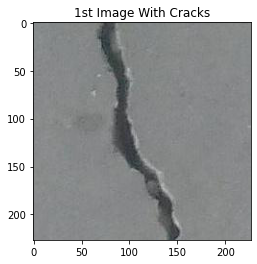

In [10]:
image1 = Image.open(positive_files[0])
plt.imshow(image1)
plt.title("1st Image With Cracks")
plt.show()

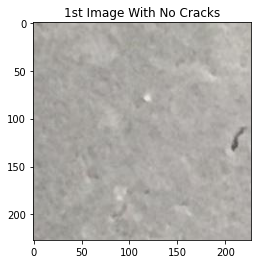

In [11]:
image2 = Image.open(negative_files[0])
plt.imshow(image2)
plt.title("1st Image With No Cracks")
plt.show()

In [12]:
number_of_samples = len(negative_files) +len(positive_files) 
number_of_samples

40000

We assign labels to the images:

In [13]:
Y=torch.zeros([number_of_samples])
Y=Y.type(torch.LongTensor)
Y[::2]=1
Y[1::2]=0
Y

tensor([1, 0, 1,  ..., 0, 1, 0])

In [14]:
all_files = [None]*number_of_samples
all_files[::2] = positive_files
all_files[1::2] = negative_files

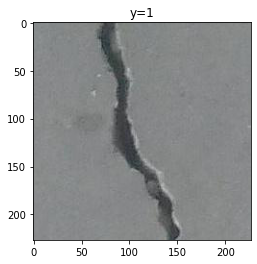

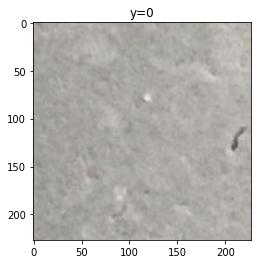

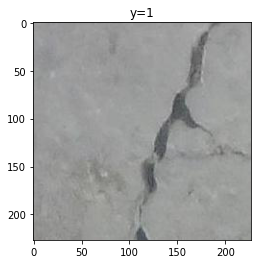

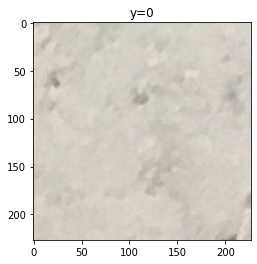

In [15]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

We combine everything together into a class named Dataset

In [16]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="/resources/data"
        positive="Positive"
        negative="Negative"

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()

        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)
    
     
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

and take a look at the first four elements of the training and validation sets

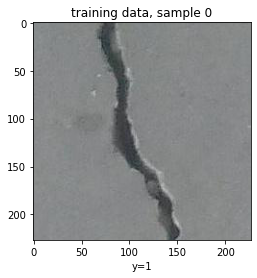

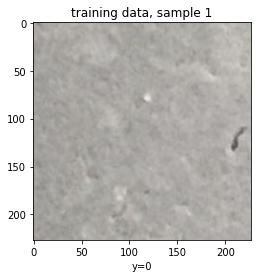

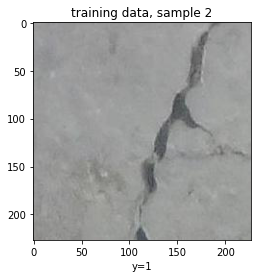

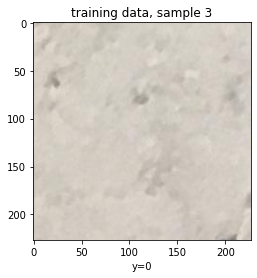

In [17]:
dataset = Dataset()
samples = range(4)
for sample  in samples:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y="+str(dataset[sample][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()

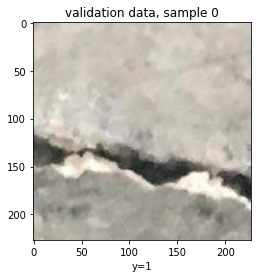

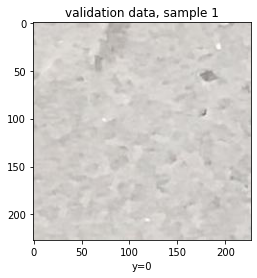

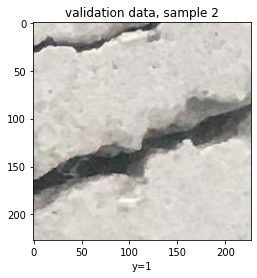

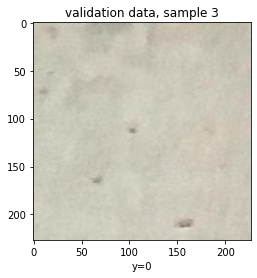

In [18]:
dataset = Dataset(train=False)
samples = range(4)
for sample  in samples:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y="+str(dataset[sample][1].item()))
    plt.title("validation data, sample {}".format(int(sample)))
    plt.show()

We now load and transorm the data into the datasets

In [19]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])
dataset_train= Dataset(transform=transform,train=True)
dataset_val= Dataset (transform=transform,train=False)

In [20]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

In [21]:
size_of_image=3*227*227
out_dim = 2

In [22]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=1000 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=1000 )

In [23]:
torch.manual_seed(0)

In [24]:
class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [25]:
model = SoftMax(size_of_image, out_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=154587, out_features=2, bias=True)
)


In [26]:
model = model.cuda()
learning_rate = 0.1
n_epochs=5
optimizer = optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)
criterion = nn.CrossEntropyLoss()

In [27]:
cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
for epoch in range(n_epochs):
    cost=0
    # Put the arch. in train mode
    model.train()

    # Loop over training data set
    for x, y in train_loader:

        #move on the GPU
        x  = x.to('cuda:0')
        y = y.to('cuda:0')

        # Zero out the gradients
        optimizer.zero_grad()

        # Pass the batch to the architecture 
        z = model(x.view(-1,size_of_image))

        # Calculate the loss to reproduce the
        # input at the output.
        loss = criterion(z, y)

        # Backpropagation 
        loss.backward()

        # Update the network weights
        optimizer.step()

        # Add to the running loss
        cost+=loss.item()

    correct=0
    #perform a prediction on the validation  data 

    # Set the model to evaluation mode
    model.eval()

    # Loop over validation data
    for x_test, y_test in test_loader:
        x_test  = x_test.to('cuda:0')
        y_test = y_test.to('cuda:0')
        z = model(x_test.view(-1,size_of_image))
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

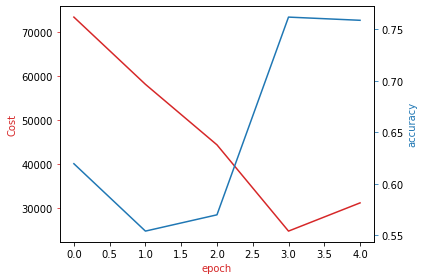

In [28]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Now try the pretrained ResNet18

In [110]:
torch.manual_seed(0)
model=models.resnet18(pretrained=True)
for param in model.parameters():
  param.requires_grad=False

num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2) #set the output

model = model.cuda()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

We define the criterion, the optimizer and the data loaders

In [111]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

transform =transforms.Compose([ transforms.Resize(224), transforms.ToTensor(), transforms.Normalize(mean, std)])
dataset_train_p= Dataset(transform=transform,train=True)
dataset_val_p= Dataset (transform=transform,train=False)

train_loader_p = torch.utils.data.DataLoader(dataset=dataset_train_p, batch_size=100 )
test_loader_p = torch.utils.data.DataLoader(dataset=dataset_val_p, batch_size=100 )

And we train the model

In [112]:
cost_list=[]
accuracy_list=[]
N_test=len(dataset_val_p)
n_epochs=5

for epoch in range(n_epochs):
    cost=0
    # Put the arch. in train mode
    model.train()

    # Loop over training data set
    for x, y in train_loader_p:

        #move on the GPU
        x  = x.to('cuda:0')
        y = y.to('cuda:0')

        # Zero out the gradients
        optimizer.zero_grad()

        # Pass the batch to the architecture 
        z = model(x)

        # Calculate the loss to reproduce the
        # input at the output.
        loss = criterion(z, y)

        # Backpropagation 
        loss.backward()

        # Update the network weights
        optimizer.step()

        # Add to the running loss
        cost+=loss.item()


    correct=0
    #perform a prediction on the validation  data 

    # Set the model to evaluation mode
    model.eval()

    # Loop over validation data
    for x_test, y_test in test_loader_p:
        x_test  = x_test.to('cuda:0')
        y_test = y_test.to('cuda:0')
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

    print('epoch [{}/{}]:    loss:{:.4f}'.format(epoch + 1, n_epochs, cost), '      val acc:{:.4f}'.format(accuracy))


epoch [1/5]:    loss:26.9046       val acc:0.9907
epoch [2/5]:    loss:7.3003       val acc:0.9923
epoch [3/5]:    loss:5.2891       val acc:0.9927
epoch [4/5]:    loss:4.3392       val acc:0.9929
epoch [5/5]:    loss:3.7543       val acc:0.9934


The loss and accuracy as a function are well behaved reaching values of high performance 

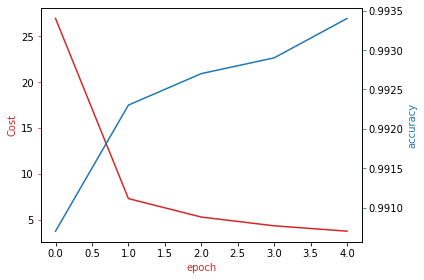

In [113]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

We can look for any misclassified images in the validation set

In [114]:
model.eval()
i = 0
k = 0
for x_test, y_test in test_loader_p:
        x_test  = x_test.to('cuda:0')
        y_test = y_test.to('cuda:0')
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        for j in range(len(yhat)):
          if k >= 4:
              break
          if yhat[j] != y_test[j]:
            print('sample: ',j+i*len(yhat), ' predicted value: ', yhat[j].to('cpu'), ' actual value: ', y_test[j].to('cpu'))
            k+=1

        i+=1
        if k >= 4:
            break

sample:  62  predicted value:  tensor(0)  actual value:  tensor(1)
sample:  94  predicted value:  tensor(0)  actual value:  tensor(1)
sample:  142  predicted value:  tensor(0)  actual value:  tensor(1)
sample:  452  predicted value:  tensor(0)  actual value:  tensor(1)
